In [1]:
# HIDDEN
from datascience import *
import matplotlib
path_data = '../../../data/'
# matplotlib.use('Agg', warn=False)
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### Applying a Function to a Column ###

We have seen many examples of creating new columns of tables by applying functions to existing columns or to other arrays. All of those functions took arrays as their arguments. But frequently we will want to convert the entries in a column by a function that doesn't take an array as its argument. For example, it might take just one number as its argument, as in the function `cut_off_at_100` defined below.

In [2]:
def cut_off_at_100(x):
    """The smaller of x and 100"""
    return min(x, 100)

In [3]:
cut_off_at_100(17)

17

In [4]:
cut_off_at_100(117)

100

In [5]:
cut_off_at_100(100)

100

The function `cut_off_at_100` simply returns its argument if the argument is less than or equal to 100. But if the argument is greater than 100, it returns 100.

In our earlier examples using Census data, we saw that the variable `AGE` had a value 100 that meant "100 years old or older". Cutting off ages at 100 in this manner is exactly what `cut_off_at_100` does.

To use this function on many ages at once, we will have to be able to *refer* to the function itself, without actually calling it.  Analogously, we might show a cake recipe to a chef and ask her to use it to bake 6 cakes.  In that scenario, we are not using the recipe to bake any cakes ourselves; our role is merely to refer the chef to the recipe.  Similarly, we can ask a table to call `cut_off_at_100` on 6 different numbers in a column.

First, we create the table `ages` with a column for people and one for their ages. For example, person `C` is 52 years old.

In [6]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages

Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


### `apply` ###

To cut off each of the ages at 100, we will use the a new Table method. The `apply` method calls a function on each element of a column, forming a new array of return values. To indicate which function to call, just name it (without quotation marks or parentheses). The name of the column of input values is a string that must still appear within quotation marks.

In [7]:
ages.apply(cut_off_at_100, 'Age')

array([ 17, 100,  52, 100,   6, 100])

What we have done here is `apply` the function `cut_off_at_100` to each value in the `Age` column of the table `ages`. The output is the array of corresponding return values of the function. For example, 17 stayed 17, 117 became 100, 52 stayed 52, and so on.

This array, which has the same length as the original `Age` column of the `ages` table, can be used as the values in a new column called `Cut Off Age` alongside the existing `Person` and `Age` columns.

In [8]:
ages.with_column(
    'Cut Off Age', ages.apply(cut_off_at_100, 'Age')
)

Person,Age,Cut Off Age
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


### Functions as Values ###
We've seen that Python has many kinds of values.  For example, `6` is a number value, `"cake"` is a text value, `Table()` is an empty table, and `ages` is a name for a table value (since we defined it above).

In Python, every function, including `cut_off_at_100`, is also a value. It helps to think about recipes again. A recipe for cake is a real thing, distinct from cakes or ingredients, and you can give it a name like "Ani's cake recipe." When we defined `cut_off_at_100` with a `def` statement, we actually did two separate things: we created a function that cuts off numbers at 100, and we gave it the name `cut_off_at_100`.

We can refer to any function by writing its name, without the parentheses or arguments necessary to actually call it. We did this when we called `apply` above.  When we write a function's name by itself as the last line in a cell, Python produces a text representation of the function, just like it would print out a number or a string value.

In [9]:
cut_off_at_100

<function __main__.cut_off_at_100>

Notice that we did not write `"cut_off_at_100"` with quotes (which is just a piece of text), or `cut_off_at_100()` (which is a function call, and an invalid one at that).  We simply wrote `cut_off_at_100` to refer to the function.

Just like we can define new names for other values, we can define new names for functions.  For example, suppose we want to refer to our function as `cut_off` instead of `cut_off_at_100`.  We can just write this:

In [10]:
cut_off = cut_off_at_100

Now `cut_off` is a name for a function.  It's the same function as `cut_off_at_100`, so the printed value is exactly the same.

In [11]:
cut_off

<function __main__.cut_off_at_100>

Let us see another application of `apply`.

### Example: Prediction ###

Data Science is often used to make predictions about the future. If we are trying to predict an outcome for a particular individual – for example, how she will respond to a treatment, or whether he will buy a product – it is natural to base the prediction on the outcomes of other similar individuals.

Charles Darwin's cousin [Sir Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton) was a pioneer in using this idea to make predictions based on numerical data. He studied how physical characteristics are passed down from one generation to the next.

The data below are Galton's carefully collected measurements on the heights of parents and their adult children. Each row corresponds to one adult child. The variables are a numerical code for the family, the heights (in inches) of the father and mother, a "midparent height" which is a weighted average [[1]](#footnotes) of the height of the two parents, the number of children in the family, as well as the child's birth rank (1 = oldest), gender, and height.

In [13]:
# Galton's data on heights of parents and their adult children
galton = Table.read_table('https://umass-data-science.github.io/CS108website/notebooks/galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


A primary reason for collecting the data was to be able to predict the adult height of a child born to parents similar to those in the dataset. Let us try to do this, using midparent height as the variable on which to base our prediction. Thus midparent height is our *predictor* variable.

The table `heights` consists of just the midparent heights and child's heights. The scatter plot of the two variables shows a positive association, as we would expect for these variables.

In [14]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


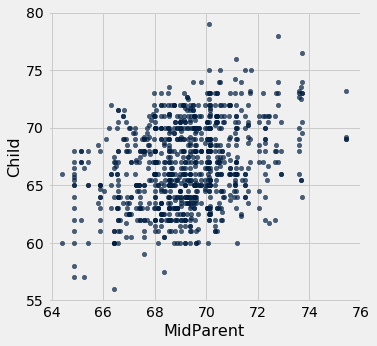

In [15]:
heights.scatter(0)

Now suppose Galton encountered a new couple, similar to those in his dataset, and wondered how tall their child would be. What would be a good way for him to go about predicting the child's height, given that the midparent height was, say, 68 inches?

One reasonable approach would be to base the prediction on all the points that correspond to a midparent height of around 68 inches. The prediction equals the average child's height calculated from those points alone.

Let's pretend we are Galton and execute this plan. For now we will just make a reasonable definition of what "around 68 inches" means, and work with that. Later in the course we will examine the consequences of such choices.

We will take "close" to mean "within half an inch". The figure below shows all the points corresponding to a midparent height between 67.5 inches and 68.5 inches. These are all the points in the strip between the red lines. Each of these points corresponds to one child; our prediction of the height of the new couple's child is the average height of all the children in the strip. That's represented by the gold dot.

Ignore the code, and just focus on understanding the mental process of arriving at that gold dot.

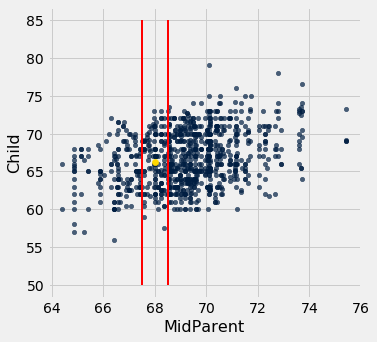

In [16]:
heights.scatter('MidParent')
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plots.scatter(68, 66.24, color='gold', s=40)

In order to calculate exactly where the gold dot should be, we first need to indentify all the points in the strip. These correspond to the rows where `MidParent` is between 67.5 inches and 68.5 inches.

In [17]:
close_to_68 = heights.where('MidParent', are.between(67.5, 68.5))
close_to_68

MidParent,Child
68.44,62
67.94,71.2
67.94,67
68.33,62.5
68.23,73
68.23,72
68.23,69
67.98,73
67.98,71
67.98,71


The predicted height of a child who has a midparent height of 68 inches is the average height of the children in these rows. That's 66.24 inches.

In [18]:
close_to_68.column('Child').mean()

66.24045801526718

We now have a way to predict the height of a child given any value of the midparent height near those in our dataset. We can define a function `predict_child` that does this. The body of the function consists of the code in the two cells above, apart from choices of names.

In [19]:
def predict_child(mpht):
    """Predict the height of a child whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children whose midparent height is
    in the range mpht plus or minus 0.5.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()                       

Given a midparent height of 68 inches, the function `predict_child` returns the same prediction (66.24 inches) as we got earlier. The advantage of defining the function is that we can easily change the value of the predictor and get a new prediction.

In [20]:
predict_child(68)

66.24045801526718

In [21]:
predict_child(74)

70.41578947368421

How good are these predictions? We can get a sense of this by comparing the predictions with the data that we already have. To do this, we first apply the function `predict_child` to the column of `Midparent` heights, and collect the results in a new column called `Prediction`.

In [ ]:
# Apply predict_child to all the midparent heights

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)

In [ ]:
heights_with_predictions

To see where the predictions lie relative to the observed data, we can draw overlaid scatter plots with `MidParent` as the common horizontal axis.

In [ ]:
heights_with_predictions.scatter('MidParent')

The graph of gold dots is called a *graph of averages,* because each gold dot is the center of a vertical strip like the one we drew earlier. Each one provides a prediction of a child's height given the midparent height. For example, the scatter shows that for a midparent height of 72 inches, the predicted height of the child would be somewhere between 68 inches and 69 inches, and indeed `predict_child(72)` returns 68.5.

Galton's calculations and visualizations were very similar to ours, except that he didn't have Python. He drew the graph of averages through the scatter diagram and noticed that it roughly followed a straight line. This straight line is now called the *regression line* and is one of the most common methods of making predictions. Galton's friend, the mathematician Karl Pearson, used these analyses to formalize the notion of *correlation*. 

This example, like the one about John Snow's analysis of cholera deaths, shows how some of the fundamental concepts of modern data science have roots going back more than a century. Galton's methods such as the one we have used here are precursors to *nearest neighbor* prediction methods that now have powerful applications in diverse settings. The modern field of *machine learning* includes the automation of such methods to make predictions based on vast and rapidly evolving datasets. 

<a id='footnotes'></a>
##### Footnotes
[1] Galton multiplied the heights of all the women by 1.08 before taking the average height of the men and the women. For a discussion of this, see [Chance](http://chance.amstat.org/2013/09/1-pagano/), a magazine published by the American Statistical Association.